In [ ]:
# Set the paths to the dataset folders
plain_folder = '/content/drive/MyDrive/NIST/sd300a/images/500/png/plain'
roll_folder = '/content/drive/MyDrive/NIST/sd300a/images/500/png/roll'

In [ ]:
import cv2
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from google.colab.patches import cv2_imshow
import random

In [ ]:
def generate_pairs(plain_folder, roll_folder):
    plain_images = os.listdir(plain_folder)
    roll_images = os.listdir(roll_folder)
    pairs = []
    labels = []
    matchCount=0
    NotmatchCount=0
    SIZE=512
    plain_path=''
    roll_path=''

    for plain_image in plain_images:
        #print(plain_image)
        if(matchCount==5000):
          break
        plain_image_temp=plain_image.split('.')[0]
        plain_id = plain_image_temp.split('_')[0]
        end_id =plain_image_temp.split('_')[3]
        roll_image = [roll_image for roll_image in roll_images if roll_image.split('.')[0].startswith(plain_id) and roll_image.split('.')[0].endswith(end_id)]
        #print(roll_image)
        #print(plain_image)
        if len(roll_image) > 0:
            roll_image = random.choice(roll_image)
            plain_path = os.path.join(plain_folder, plain_image)
            roll_path = os.path.join(roll_folder, roll_image)
            pairs.append([plain_path, roll_path])
            labels.append(1)  # Positive pair
            matchCount=matchCount+1
            img_plain = cv2.imread(plain_path)
            #print(roll_image)
            # open cv reads images in BGR format so we have to convert it to RGB
            #img_plain = cv2.cvtColor(img_plain, cv2.COLOR_BGR2RGB)
            #resizing image
            img_plain = cv2.resize(img_plain, (SIZE, SIZE))
            #img_plain = img_plain.astype('float32') / 255.0

            img_roll = cv2.imread(roll_path)
            # open cv reads images in BGR format so we have to convert it to RGB
            #img_roll = cv2.cvtColor(img_roll, cv2.COLOR_BGR2RGB)
            #resizing image
            img_roll = cv2.resize(img_roll, (SIZE, SIZE))
            #img_roll = img_roll.astype('float32') / 255.0

          # Save img_plain and img_roll

            plain_save_path = os.path.join("/content/drive/MyDrive/Plain_image_512", plain_image)
            roll_save_path = os.path.join("/content/drive/MyDrive/Roll_image_512", roll_image)

            cv2.imwrite(plain_save_path, img_plain)
            cv2.imwrite(roll_save_path, img_roll)

In [ ]:
generate_pairs(plain_folder, roll_folder)

In [ ]:
plain_folder_512 = '/content/drive/MyDrive/Plain_image_512'
roll_folder_512 = '/content/drive/MyDrive/Roll_image_512'

In [ ]:
print(len(os.listdir(plain_folder_512)))
print(len(os.listdir(roll_folder_512)))

691
691


/content/drive/MyDrive/Plain_image_512/00001560_plain_500_03.png


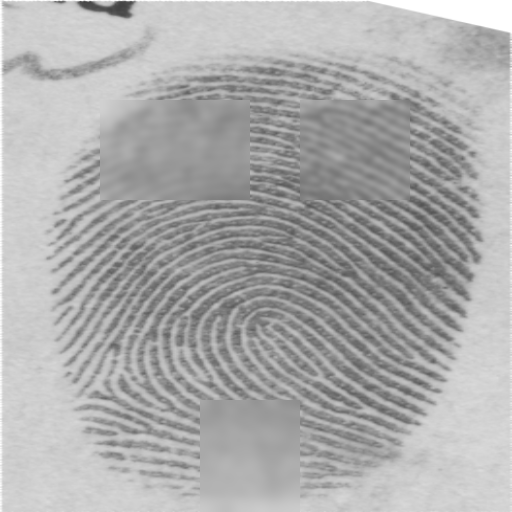

/content/drive/MyDrive/Plain_image_512/00001736_plain_500_10.png


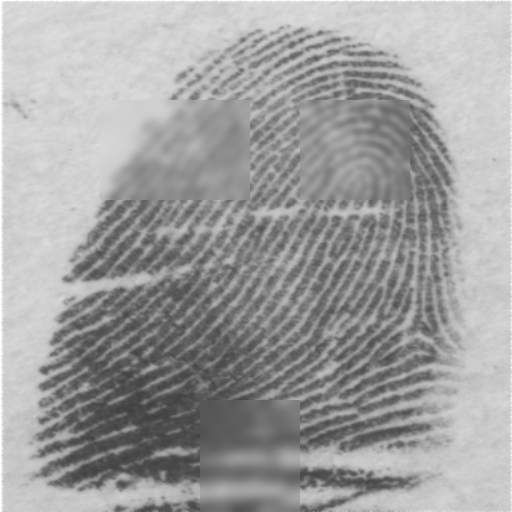

/content/drive/MyDrive/Plain_image_512/00001032_plain_500_05.png


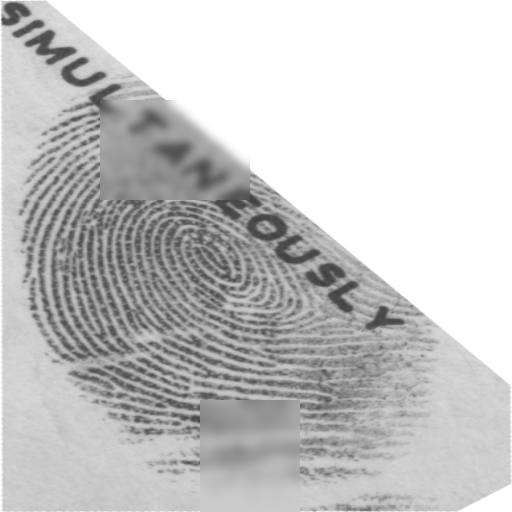

/content/drive/MyDrive/Plain_image_512/00001317_plain_500_03.png


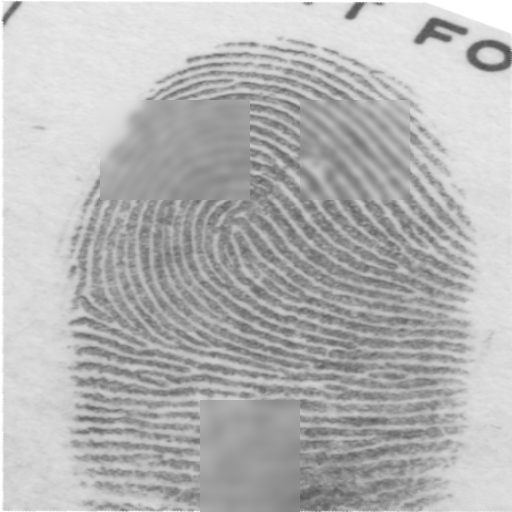

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

plain_images_512=os.listdir(plain_folder_512)
count=0
for image_path in plain_images_512[:4]:
    image_path='/content/drive/MyDrive/Plain_image_512/'+image_path
    print(image_path)
    if count==5:
      break
    # Load the image
    image = cv2.imread(image_path)

    # Define the region you want to blur (in this case, a rectangular area)
    x, y, width, height = 100, 100, 150, 100  # Example coordinates and dimensions
    region_of_interest = image[y:y+height, x:x+width]

    # Apply Gaussian blur to the region of interest
    blurred_region = cv2.GaussianBlur(region_of_interest, (25, 25), 0)

    # Replace the original region with the blurred region
    image[y:y+height, x:x+width] = blurred_region
     # Define the region you want to blur (in this case, a rectangular area)
    x, y, width, height = 200, 400, 100, 120  # Example coordinates and dimensions
    region_of_interest = image[y:y+height, x:x+width]

    # Apply Gaussian blur to the region of interest
    blurred_region = cv2.GaussianBlur(region_of_interest, (35, 35), 0)

    # Replace the original region with the blurred region
    image[y:y+height, x:x+width] = blurred_region

    x, y, width, height = 300, 100, 110, 100  # Example coordinates and dimensions
    region_of_interest = image[y:y+height, x:x+width]

    # Apply Gaussian blur to the region of interest
    blurred_region = cv2.GaussianBlur(region_of_interest, (15, 15), 0)

    # Replace the original region with the blurred region
    image[y:y+height, x:x+width] = blurred_region
    # Display the blurred image


    cv2_imshow(image)
    count+=1


/content/drive/MyDrive/Plain_image_512/00001560_plain_500_03.png


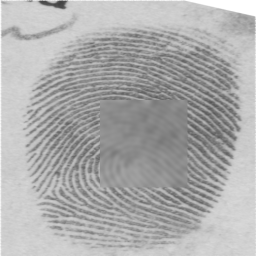

/content/drive/MyDrive/Plain_image_512/00001736_plain_500_10.png


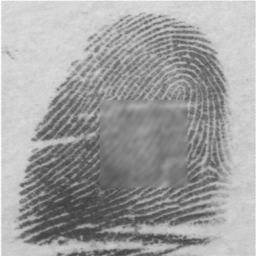

/content/drive/MyDrive/Plain_image_512/00001032_plain_500_05.png


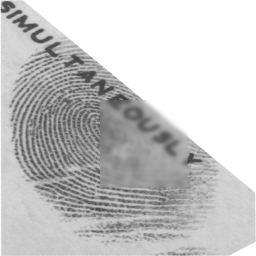

/content/drive/MyDrive/Plain_image_512/00001317_plain_500_03.png


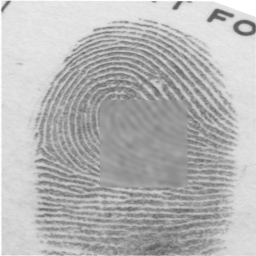

/content/drive/MyDrive/Plain_image_512/00001093_plain_500_04.png


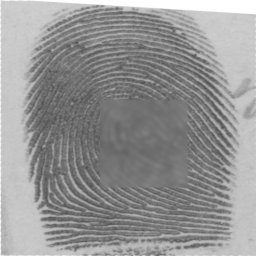

/content/drive/MyDrive/Plain_image_512/00001001_plain_500_10.png


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

plain_images_512=os.listdir(plain_folder_512)
count=0
for image_path in plain_images_512:
    image_path='/content/drive/MyDrive/Plain_image_512/'+image_path
    print(image_path)
    if count==5:
      break
    # Load the image
    image = cv2.imread(image_path)

    # Define the region you want to blur (in this case, a rectangular area)
    x, y, width, height = 200, 200, 175, 175  # Example coordinates and dimensions
    region_of_interest = image[y:y+height, x:x+width]

    # Apply Gaussian blur to the region of interest
    blurred_region = cv2.GaussianBlur(region_of_interest, (25, 25), 0)

    # Replace the original region with the blurred region
    image[y:y+height, x:x+width] = blurred_region

    image = cv2.resize(image, (256, 256))
    # Display the blurred image
    cv2_imshow(image)
    count+=1

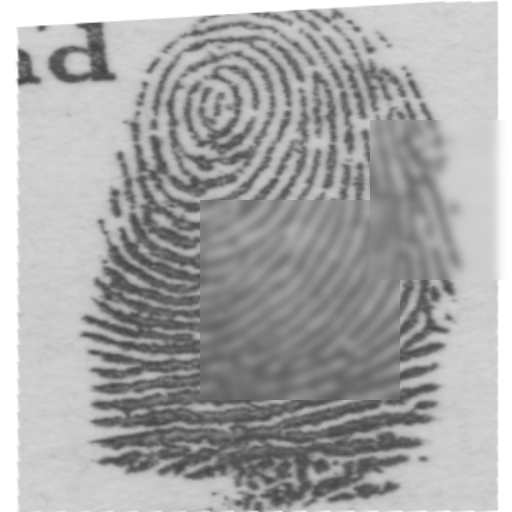

In [ ]:
import cv2
import numpy as np

# Load the image
image_path = "/content/drive/MyDrive/Plain_image_512/00001000_plain_500_09.png"
image = cv2.imread(image_path)

# Define the first circular region
center1 = (300, 300)  # Example center coordinates for the first region
radius1 = 100  # Example radius for the first region

# Extract the first circular region
circular_region1 = image[center1[1]-radius1:center1[1]+radius1, center1[0]-radius1:center1[0]+radius1]

# Apply a blur to the first circular region
blurred_circular_region1 = cv2.GaussianBlur(circular_region1, (25, 25), 0)

# Replace the original first circular region with the blurred version
image[center1[1]-radius1:center1[1]+radius1, center1[0]-radius1:center1[0]+radius1] = blurred_circular_region1

# Define the second circular region
center2 = (450, 200)  # Example center coordinates for the second region
radius2 = 80  # Example radius for the second region

# Extract the second circular region
circular_region2 = image[center2[1]-radius2:center2[1]+radius2, center2[0]-radius2:center2[0]+radius2]

# Apply a blur to the second circular region
blurred_circular_region2 = cv2.GaussianBlur(circular_region2, (25, 25), 0)

# Replace the original second circular region with the blurred version
image[center2[1]-radius2:center2[1]+radius2, center2[0]-radius2:center2[0]+radius2] = blurred_circular_region2

# Display the result
cv2_imshow(image)







/content/drive/MyDrive/Plain_image_512/00001560_plain_500_03.png


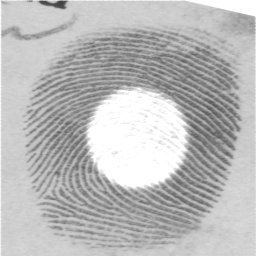

/content/drive/MyDrive/Plain_image_512/00001736_plain_500_10.png


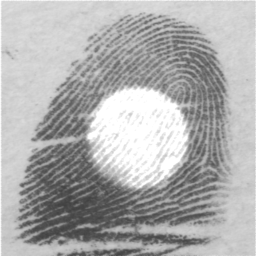

/content/drive/MyDrive/Plain_image_512/00001032_plain_500_05.png


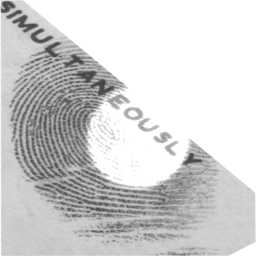

/content/drive/MyDrive/Plain_image_512/00001317_plain_500_03.png


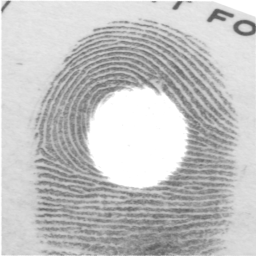

/content/drive/MyDrive/Plain_image_512/00001093_plain_500_04.png


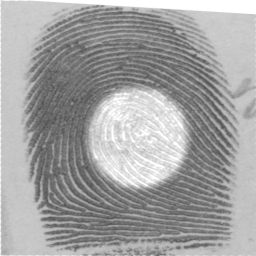

/content/drive/MyDrive/Plain_image_512/00001001_plain_500_10.png


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

plain_images_512 = os.listdir(plain_folder_512)
count = 0

for image_path in plain_images_512:
    image_path = '/content/drive/MyDrive/Plain_image_512/' + image_path
    print(image_path)

    if count == 5:
        break

    # Load the image
    image = cv2.imread(image_path)

    # Define the center and radius of the circular region
    center = (275, 275)  # Example coordinates for the center of the circle
    radius = 100  # Example radius of the circle

    # Create a circular mask with reduced brightness
    mask = np.zeros_like(image)
    cv2.circle(mask, center, radius, (255, 255, 255), thickness=cv2.FILLED)  # White circle

    # Apply Gaussian blur to the circular mask
    blurred_mask = cv2.GaussianBlur(mask, (25, 25), 0)

    # Apply the blurred circular mask to the image
    masked_image = cv2.bitwise_and(image, blurred_mask)

    # Apply Gaussian blur to the circular region of interest
    blurred_region = cv2.GaussianBlur(masked_image, (25, 25), 0)

    # Replace the original circular region with the blurred region
    image = cv2.addWeighted(image, 1, blurred_region, 1, 0)

    image = cv2.resize(image, (256, 256))

    # Display the blurred image
    cv2_imshow(image)
    count += 1

